***
# Multilingual Bot
***
How exciting will it be to interact with computers if they can understand any language we speak. **Support for multiple languages** is the feature being looked for in chatbots now-a-days.

***
# Table of Contents
***
- [Introduction](#Introduction)
- [Problem Statement](#Problem-Statement)
- [Multilingual Bot](#the-multilingual-bot)
- [Solution](#Solution)
    - [Classical Approach](#Classical-Approach)
    - [Transfer Learning](#Transfer-Learning)
- [LASER](#LASER)
    - [Architecture](#Architecture)
    - [Training](#Training)
    - [Embedding Vectors](#Embedding-Vectors)
    - [Installation](#Installation)
- [Bot Integration](#Bot-Integration)
- [Import Libraries](#Import-Libraries)
- [Load Dataset](#Load-Dataset)
- [Explore Dataset](#Explore-Dataset)
- Feature Extraction
    - Similarity
- Model
    - Selection
    - Creation
    - Training
    - Prediction
- Evaluation
- Aideu
- References

## Introduction
***
In present world there is a huge demand of automation. Everyone, mainly the service providers, wants to interact as less as they can with their customers but at the same time be as helpful as they can. Chatbots are real players in this scenario. They are supposed to have sufficient knowledge about their domain and be friendly with the user at the same time providing anything for everything of the company as it is vital to keep customers happy. 

## Problem Statement
***
Using a chatbot to fulfill users' demand and queries is helpful as long as both users and chatbots are talking in same language. It is not practical to assume that every user is willing to talk in a preferred language due to their choice and convenience. So it is required for the bot to be able to handle multiple language i.e. the bot should have knowledge of the domain in possibly all the languages in which any user can interact with.

If we narrow down to a particular case of training of bots where textual data is used to make the bot understand the features and services being provided by the company, the first issue that we face is that we have to write document in all the languages in which we want to train the bot. It is possible but not efficient.
Let us first look at what a bot has to become to deliver such output.

## Multilingual Bot <a name="the-multilingual-bot"></a>
***
When we say that a bot is answering the queries of a user efficiently we mean two things.
    - The user is understanding the bot and vice versa.
    - Bot has the domain knowledge.
The first thing requires the bot to interact in a language in which the user is comfortable with, while the second thing requires the bot to be trained in that specific languages. So the output of first point is dependent on the output of second point.
Usually training of a bot is done by providing a set of texts which consist the domain knowledge. But the text can be in any one language only at one time. 

So we have to train the bot repeatedly for different languages while having text in all those languages. Once the training is complete the resultant bot is capable of answering users in their own language and what we see is the work of a **Multilingual Bot**

## Solution
***
Everything we talked about sounds fascinating but the main task we have to do is to train a bot. It can be done in two ways.
    1. Classical Approach
    2. Transfer Learning
As we know the bot is just a mimic of human and the way human talks. In any conversation to give response to a particular sentence we first have to know the context in which the other person is talking. Then only the conversation can be meaningful. 

What a bot will do is,
- Take the qurey of the user as input.
- Classify the query among the given categories.
- Once the category is decided it will look for the answer or reply of that query in it's database.
- Reply the user with that response.

Long story short we need classification and since the bot training is based on text this whole topic will be covering **Text Classification**, but with some tweaks.
    
### Classical Approach
The most basic idea to solve the case of multilingual bot is to train the bot in each language which we want it to converse in. Here are steps to do that.
- For every language
    - Create the dataset i.e. text with their respective categories (as we are focusing on classification).
    - Create a suitable machine learning classifier to learn from that dataset.
    - Train that model.
    - Integrate the model with the bot with an ID to store the language on which the model is trained.
    - For each query
        - Detect the language.
        - Pass the query to the model trained for that language
        - Get the category and reply as discussed above.

It seems pretty straight forward but there is a tradeoff. For 2 or 3 languages this approach may be suitable but as the language is increased these issues will become a headache.
- For each langauage
    - Maintain the dataset.
    - Save trained models.
    - If there is some change in data then retrain the model.
- For maintaing that much amount of data is a problem and the bot will be very heavy **figuratively ;-)**.

This is not advised

## Transfer Learning
Data has been a great issue for us from the start. Getting the accurate data in right format is seldom observed. This is the same case here. Any company will store their well documented domain knowledge in single language only and it is easy for us to train the bot for that language. But what about other languages? **Transfer Learning** is a good solution to that.

#### What is Transfer Learning?
In layman terms, if we have two tasks which are similar to each other, in our case training a model for text classification in two different languages, and we have data sufficient enough for only one then we can use the training process of first task to execute the second task i.e. the transfer of knowledge from first training to predict categories in second.

#### How it is better than classical approach?
The following points will make the point more clear.
- Given the dataset in one language train a model.
- Use that model to predict categories for other languages.
- For user queries in any language the model will predict the category.
- Depending on the category bot will fetch the answer and give response to the user in his language.

The people at **Facebook** has provided a solution for this. It is known as **LASER**.

## LASER
***
Those who are not a fan of abbreveation LASER means **Language Agnostic SEntence Representations**. LASER is a deep neural netwrok model trained for many tasks one of which is to produce sentence embedding vectors without being concerned about the language.
> It considers the language of the sentence but the vectors are language independent.

For a detailed information about how it works and it's training process one can follow these links.
[Information](https://code.fb.com/ai-research/laser-multilingual-sentence-embeddings/)
[Paper](https://arxiv.org/abs/1812.10464)
[Source](https://github.com/facebookresearch/LASER)

For the purpose of generating sentence embedding vector LASER takes a sentence as input and produces a vector of size 1024. Its architecture and other informations are as follows.

### Architecture
LASER is a combination of an encoder and a decoder.
> It is expected from the used that he/she has a basic knowledge of how LSTM and BiLSTM works. Feel free to read these two topics before going further into this tutorial.

- **Encoder**
    - It is a 5-layer BiLSTM model.
    - Input sentence is passed to a BPE encoder and the BPE embedding is send to the first BiLSTM Layer.
    - Each layer has 512 LSTM cells in both forward and backward direction.
    - After the fifth BiLSTM layer a maxpooling is done to get a vector of size 1024.
- **Decoder**
    - It is a single layer of LSTM cells.
    - Input is a sentence BPE embedding, language ID, and the embedding vector obtained by the encoder. (**Will be discussed later.**)
    - After the LSTM layer a softmax layer is there to give text which forms sentence.

A snapshot of the model architecture is given.

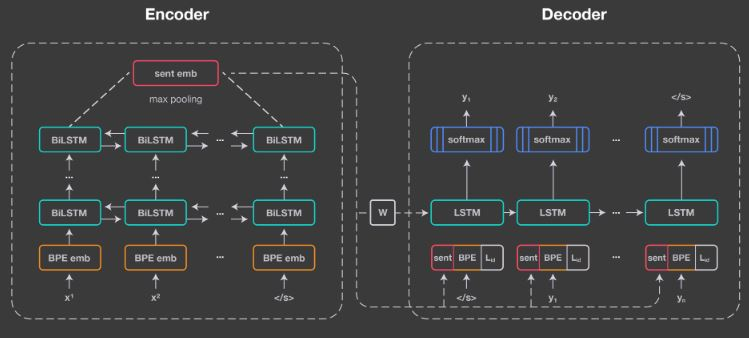

### Training
This whole setup is supposed to generate language independent sentence embedding vectors. A list of languages is made and all those languages were paired with English. In each pair there is a set of 1000 sentences in English and their translation in other languages.

A vocabulary of BPE codes is created for all these languages. For more information on BPE go [here](https://google.github.io/seq2seq/nmt/). Beat around the bush to get more insight on this.

For any sentence this vocabulary is used to create a BPE embedding vector and that will be used as input. While training sentence in Language **A** is fed in the encoder and sentence in Language __B__ is fed in the decoder.

The output of the decoder is expected to be same as the sentence in __B__. Once the training is done the output of the encoder is treated as the sentence embedding vectors.

> Again this description is just for intuition. For detailed analysis of the architecture and training kindly refer to above mentioned links.

### Embedding Vectors
But why are we calculating the embedding vectors and how they are useful? I am not going deep into embedding vectors, but just to clear view, embedding vectors can represent word or sentence. They contain information about the syntax and the semantics. In other words they contain the contextual information of the input i.e. in which scenario it is being used currently.

If two sentences have same meaning or same information can be extracted from them then their embedding vectors are supposed to be exactly same.

This same idea is used in LASER. The only additional component introduced was that two sentences of two different languages will have same embedding vector is they are being used in same context i.e. if plotted in a vector space these embedding vectors will lie in same neighbourhood. For more clarity look at this snapshot.

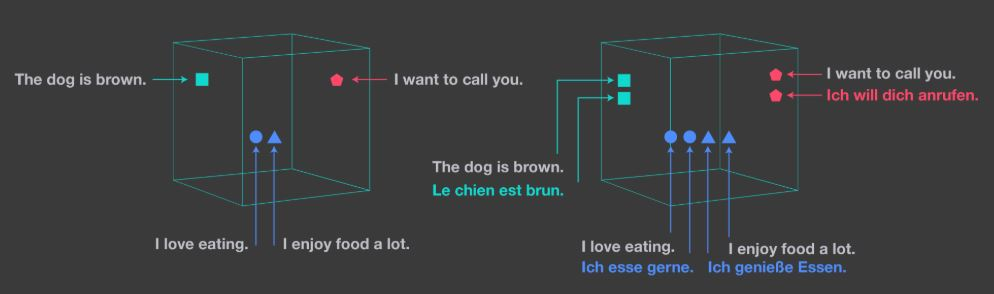

### Installation

In the [github](https://github.com/facebookresearch/LASER) repository of LASER the steps are given of how to install it. There are various ways depending on OS and what tool one uses to install. Personally for me the docker was very easy.

> Again you must have a knowledge of Docker to install it, if you are using Docker.

Once installed, to get the embedding of single sentence in a language follow these steps.
- Go to `/path/to/LASER/`.
- Add this path to environment variable.
- Navigate to `/path/to/LASER/tasks/embed/`.
- Create a text file and write the sentence(s) in it for which embedding is required.
- Run this command, `bash embed.sh /path/to/FILE.txt LANGUAGE /path/to/embedding.raw`

You will get a `.raw` file which will contain embedding vectors of each sentence in the text file. There are codes available for how to read the `embedding.raw`.

## Bot Integration
***
Now as we can represent the sentences of various language in their respective embeddings we are ready to train a machine learning model on data available in one language and use that model to predict categories for different languages.

So we will have a single model which can handle different languages.

## Import Libraries
***
A list of python libraries which will be used in this tutorial

In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from keras.callbacks import EarlyStopping
from scipy import spatial

## Load Dataset
***
The dataset contains questions which are mapped to their respective categories. To convert the question such that a model can be trained on that we need to convert the questions into their respective embedding vectors. This part is done with the help of LASER.

The output of the LASER is a raw binary file. We have to first convert it to the csv format which then can easily be operated on for training.

The function **read_raw_embedding** and **create_labelled_data** are used to create the csv file from the raw file.
Note that the file path need to be changed according to the language which may be *English*, *Spanish*, *Arabic* or any other language. In this tutorial I have used *English* and *Spanish*.

## Explore Dataset
***
The dataset used in this tutorial can be found [here](http://www.cs.cmu.edu/~ark/QA-data/).
This dataset contains factoid question and answer pair about 37 different topics. A few examples are as follows.

- Is Uruguay located in the northwesten part of Africa?
- What is the largest country in the world?
- Who did President Lincoln promote of major general in the regular army, effective July 4?

And topics may include

- Uruguay
- Canada
- Ulysses_S._Grant

respectively.

Each pair of topic and question is associated with an answer.
The dataset also contains some other features apart from this but we are going to use only the question and topic pair of each data point.

In [2]:
def read_raw_embedding(filename):
    dim = 1024 # the size of the embedding vector
    X = np.fromfile(filename, dtype=np.float32, count=-1) # read the embedding from the raw file in a numpy array.
    X.resize(X.shape[0]//dim, dim) # arrange the array according to the dimension.
    return X

In [3]:
def create_labelled_data():
    d = pd.read_csv("./data/chatbot_data.csv")
    labels = d['category']
    embed = read_raw_embedding('./embeddings/spa_embed.raw')
    data = pd.DataFrame(embed)
    data['labels'] = labels
    data.to_csv('./embed_csv/spa_embed.csv', index_label='index')

In [4]:
create_labelled_data()

## Create Neural Network
***

Now comes the time where we dig deep into Machine Learning and create our own network to train on the given data.

It is a Multi-layer Perceptron model. The model summary is shown at the end of this tutorial, but as a start I am describing a few points.
- The input layer contains 1024 neurons which will give the each element of the embedding vector as their output.
- There are 3 hidden layers each with 100 neurons.
- Since the total number of classes is 37 the output layer has 37 neurons.
- After a number of tries this structure is found suitable for training this type of data.
- Various regularisation techniques are used in this network in terms of initialization and dropout.

A mild description of various functions are given also.

In [5]:
def create_neural_net(input_dim, n_hid, learn_rate, dropout):
    '''To create a neural network architecture.'''
    model = Sequential()
    model.add(Dense(n_hid[0], activation='relu', kernel_initializer='he_uniform',input_dim=input_dim))
    model.add(Dropout(dropout))
    for i in range(1, len(n_hid)):
        model.add(Dense(n_hid[i], activation='relu', kernel_initializer='he_uniform'))
        model.add(Dropout(dropout))
    model.add(Dense(37, activation='softmax', kernel_initializer='he_uniform'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    return model

In [6]:
def read_data():
    '''To read the training data from csv file.'''
    file = pd.read_csv('./embed_csv/eng_embed.csv')
    file = file.sample(frac=1)
    features = file.drop(['index', 'labels'], axis=1).values
    intents = file['labels'].values
    data_points, num_features = features.shape
    return features, intents, data_points, num_features, file

In [7]:
def get_best_model(split_records):
    '''To get the model which is trained best i.e. which has not overfitted too much.'''
    records = []
    for record in split_records:
        if record[4]>0:
            records.append(record)
    df = pd.DataFrame(records, columns=['index', 'hidden_nodes' ,'train_accuracy', 'test_accuracy', 'difference', 'dropout', 'learning_rate'])
    df = df.sort_values(by=['difference'])
    return df

In [8]:
def read_test_data(language):
    '''To read the test data. In this case Spanish data.'''
    file = pd.read_csv('./embed_csv/'+language+'_embed.csv')
    features = file.drop(['index', 'labels'], axis=1).values
    intents = file['labels']
    return features, intents

In [9]:
def get_predictions(model, features):
    '''To get the predictions for the spanish questions.'''
    predictions = model.predict(features)
    intent_predicted = np.argmax(predictions, axis=1)
    return intent_predicted

In [10]:
def get_accuracy(model, features, intents):
    '''To measure the accuracy of the model on test data.'''
    intent_predicted = get_predictions(model, features)
    accuracy = accuracy_score(intents, intent_predicted)
    return accuracy

In [11]:
def evaluate(mlp):
    '''Evaluate the best model obtained after training on Spanish data.'''
    languages = ['spa']
    for language in languages:
        features, intents = read_test_data(language)
        for i, intent in enumerate(intents):
            intents[i] = text_to_number[intents[i]]
        intents = np.array(list(intents))
        accuracy = get_accuracy(mlp, features, intents)
        print(language, accuracy)

In [12]:
def create_dict(intents):
    '''An utility function to convert textual labels of the class to integral labels and vice versa.'''
    unique_intents = set(intents)
    text_to_number = {}
    number_to_text = {}
    for i, intent in enumerate(unique_intents):
        text_to_number[intent] = i
        number_to_text[i] = intent
    return text_to_number, number_to_text

In [13]:
def train_neural_network_seperate(features, intents, input_dim, num_intents, n_hid, learn_rate, num_epochs, cb_list, dropout):
    '''Where actual training happens.'''
    num_splits=10
    from sklearn.utils.multiclass import type_of_target
    intents = np.array(list(intents))
    print(type_of_target(intents))
    skf = StratifiedKFold(n_splits=num_splits, random_state=1)
    split_records = []
    models = []
    model_history = []
    split = 1
    for train_index, test_index in skf.split(features, intents):
        mlp = create_neural_net(input_dim, n_hid, learn_rate, dropout)
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test = intents[train_index], intents[test_index]
        print(y_train)
        y_train = to_categorical(y_train, num_classes=num_intents, dtype='float32')
        y_test = to_categorical(y_test, num_classes=num_intents, dtype='float32')
        history = mlp.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=num_epochs, verbose=2, shuffle=True, callbacks=cb_list)
        models.append(mlp)
        model_history.append(history)
        train_predictions = mlp.predict(x_train)
        train_predictions = (train_predictions>0.5)
        test_predictions = mlp.predict(x_test)
        test_predictions = (test_predictions>0.5)
        train_accuracy = float('{0:.3f}'.format(accuracy_score(y_train, train_predictions)))
        test_accuracy = float('{0:.3f}'.format(accuracy_score(y_test, test_predictions)))
        difference = float('{0:.3f}'.format(train_accuracy-test_accuracy))
        print('train_accuracy = {}, test_accuracy = {}'.format(train_accuracy, test_accuracy))
        temp = [split, n_hid, train_accuracy, test_accuracy, difference, dropout, learn_rate]
        split_records.append(temp)
        split+=1
    return split_records, models, model_history

## Similarity Measurement
***
As we discussed that the embedding vectors of same sentences are supposed to be same, we can actually check that whether it is correct or not. For that we are going to use cosine similarity of two vectors one for English sentence and one for the same sentence in Spanish language.

In [39]:
def similarity():
    eng_data = pd.read_csv("./embed_csv/eng_embed.csv")
    spa_data = pd.read_csv("./embed_csv/spa_embed.csv")
    eng_embed = eng_data.drop(['index', 'labels'], axis = 1)
    spa_embed = spa_data.drop(['index', 'labels'], axis = 1)
    final_similarity = 0;
    for i in range(eng_embed.shape[0]):
        eng_series = eng_embed.loc[i]
        spa_series = spa_embed.loc[i]
        intermediate_similarity = 1 - spatial.distance.cosine(eng_series, spa_series)
        final_similarity = final_similarity + intermediate_similarity
    final_similarity = final_similarity/eng_embed.shape[0]
    print(final_similarity)

In [40]:
similarity()

0.9268003577826963


Here we can see that the two embedding vectors are very much alike.

Now, the functions defined above will help us to train our model and test it.
The various hyper-parameters are set after a series of tries with different values.

In [14]:
features, intents, data_points, num_features, dataset = read_data()
text_to_number, number_to_text = create_dict(intents)
for i, intent in enumerate(intents):
    intents[i] = text_to_number[intents[i]]
num_intents = len(set(intents))
n_hid = [100, 100, 100]
learn_rate = 0.1
dropout = 0.2
num_epochs = 180
es = EarlyStopping(monitor='categorical_accuracy', min_delta=0.00001, patience=5, restore_best_weights=True, verbose=1, baseline=0.01)
cb_list = [es]

train_iteration= 0

train_iteration += 1
split_reocrds, models, model_history = train_neural_network_seperate(features, intents, num_features, num_intents, n_hid, learn_rate, num_epochs, cb_list, dropout)

multiclass


C:\Users\Stolaine\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[23 35  9 ... 27  3 30]
Instructions for updating:
Use tf.cast instead.
Train on 4536 samples, validate on 522 samples
Epoch 1/180
 - 5s - loss: 3.4032 - categorical_accuracy: 0.0882 - val_loss: 2.8769 - val_categorical_accuracy: 0.2586
Epoch 2/180
 - 1s - loss: 2.4025 - categorical_accuracy: 0.3322 - val_loss: 1.6677 - val_categorical_accuracy: 0.6418
Epoch 3/180
 - 1s - loss: 1.4695 - categorical_accuracy: 0.6014 - val_loss: 0.9337 - val_categorical_accuracy: 0.7759
Epoch 4/180
 - 1s - loss: 0.9351 - categorical_accuracy: 0.7522 - val_loss: 0.6039 - val_categorical_accuracy: 0.8621
Epoch 5/180
 - 1s - loss: 0.6542 - categorical_accuracy: 0.8313 - val_loss: 0.4279 - val_categorical_accuracy: 0.8985
Epoch 6/180
 - 1s - loss: 0.4829 - categorical_accuracy: 0.8642 - val_loss: 0.3048 - val_categorical_acc

Epoch 6/180
 - 1s - loss: 0.5308 - categorical_accuracy: 0.8596 - val_loss: 0.3012 - val_categorical_accuracy: 0.9340
Epoch 7/180
 - 1s - loss: 0.4061 - categorical_accuracy: 0.8915 - val_loss: 0.2494 - val_categorical_accuracy: 0.9301
Epoch 8/180
 - 1s - loss: 0.3224 - categorical_accuracy: 0.9186 - val_loss: 0.1896 - val_categorical_accuracy: 0.9553
Epoch 9/180
 - 1s - loss: 0.2665 - categorical_accuracy: 0.9293 - val_loss: 0.1432 - val_categorical_accuracy: 0.9670
Epoch 10/180
 - 1s - loss: 0.2083 - categorical_accuracy: 0.9443 - val_loss: 0.1137 - val_categorical_accuracy: 0.9786
Epoch 11/180
 - 1s - loss: 0.1800 - categorical_accuracy: 0.9522 - val_loss: 0.0992 - val_categorical_accuracy: 0.9806
Epoch 12/180
 - 1s - loss: 0.1581 - categorical_accuracy: 0.9573 - val_loss: 0.0819 - val_categorical_accuracy: 0.9864
Epoch 13/180
 - 1s - loss: 0.1291 - categorical_accuracy: 0.9676 - val_loss: 0.0616 - val_categorical_accuracy: 0.9942
Epoch 14/180
 - 1s - loss: 0.1142 - categorical_accu

Epoch 13/180
 - 1s - loss: 0.1149 - categorical_accuracy: 0.9710 - val_loss: 0.0205 - val_categorical_accuracy: 0.9980
Epoch 14/180
 - 1s - loss: 0.0865 - categorical_accuracy: 0.9791 - val_loss: 0.0197 - val_categorical_accuracy: 0.9980
Epoch 15/180
 - 1s - loss: 0.0872 - categorical_accuracy: 0.9789 - val_loss: 0.0145 - val_categorical_accuracy: 0.9980
Epoch 16/180
 - 1s - loss: 0.0634 - categorical_accuracy: 0.9851 - val_loss: 0.0107 - val_categorical_accuracy: 1.0000
Epoch 17/180
 - 1s - loss: 0.0572 - categorical_accuracy: 0.9892 - val_loss: 0.0074 - val_categorical_accuracy: 1.0000
Epoch 18/180
 - 1s - loss: 0.0560 - categorical_accuracy: 0.9864 - val_loss: 0.0081 - val_categorical_accuracy: 0.9980
Epoch 19/180
 - 1s - loss: 0.0462 - categorical_accuracy: 0.9890 - val_loss: 0.0052 - val_categorical_accuracy: 1.0000
Epoch 20/180
 - 1s - loss: 0.0512 - categorical_accuracy: 0.9881 - val_loss: 0.0070 - val_categorical_accuracy: 1.0000
Epoch 21/180
 - 1s - loss: 0.0455 - categorical_

Epoch 31/180
 - 1s - loss: 0.0294 - categorical_accuracy: 0.9919 - val_loss: 0.0072 - val_categorical_accuracy: 0.9980
Epoch 32/180
 - 1s - loss: 0.0285 - categorical_accuracy: 0.9910 - val_loss: 0.0022 - val_categorical_accuracy: 1.0000
Epoch 33/180
 - 1s - loss: 0.0224 - categorical_accuracy: 0.9939 - val_loss: 0.0030 - val_categorical_accuracy: 1.0000
Epoch 34/180
 - 1s - loss: 0.0282 - categorical_accuracy: 0.9906 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 35/180
 - 1s - loss: 0.0382 - categorical_accuracy: 0.9879 - val_loss: 0.0025 - val_categorical_accuracy: 1.0000
Epoch 36/180
 - 1s - loss: 0.0257 - categorical_accuracy: 0.9925 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 37/180
 - 1s - loss: 0.0193 - categorical_accuracy: 0.9950 - val_loss: 0.0021 - val_categorical_accuracy: 1.0000
Epoch 38/180
 - 1s - loss: 0.0237 - categorical_accuracy: 0.9925 - val_loss: 9.2853e-04 - val_categorical_accuracy: 1.0000
Epoch 39/180
 - 1s - loss: 0.0165 - categori

Epoch 25/180
 - 1s - loss: 0.0235 - categorical_accuracy: 0.9958 - val_loss: 0.0032 - val_categorical_accuracy: 1.0000
Epoch 26/180
 - 1s - loss: 0.0288 - categorical_accuracy: 0.9932 - val_loss: 0.0033 - val_categorical_accuracy: 1.0000
Epoch 27/180
 - 1s - loss: 0.0283 - categorical_accuracy: 0.9932 - val_loss: 0.0048 - val_categorical_accuracy: 1.0000
Epoch 28/180
 - 1s - loss: 0.0309 - categorical_accuracy: 0.9923 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 29/180
 - 1s - loss: 0.0298 - categorical_accuracy: 0.9906 - val_loss: 0.0040 - val_categorical_accuracy: 0.9980
Epoch 30/180
 - 1s - loss: 0.0275 - categorical_accuracy: 0.9912 - val_loss: 0.0028 - val_categorical_accuracy: 1.0000
Restoring model weights from the end of the best epoch
Epoch 00030: early stopping
train_accuracy = 0.999, test_accuracy = 1.0
[17 27  0 ... 12 21 21]
Train on 4571 samples, validate on 487 samples
Epoch 1/180
 - 3s - loss: 3.3764 - categorical_accuracy: 0.0974 - val_loss: 2.7666 - val

After the training is complete it is time to evaluate the best trained model.

In [41]:
sorted_stats = get_best_model(split_reocrds)

print(sorted_stats)

   index     hidden_nodes  train_accuracy  test_accuracy  difference  dropout  \
0      2  [100, 100, 100]           0.999          0.998       0.001      0.2   
1      8  [100, 100, 100]           1.000          0.998       0.002      0.2   
2     10  [100, 100, 100]           0.999          0.994       0.005      0.2   

   learning_rate  
0            0.1  
1            0.1  
2            0.1  


We will chose that model as the best model which has highest **train_accuracy** and lowest difference between **train_accuracy** and **test_accuracy**.

In [42]:
mlp = models[7]

mlp.summary()

evaluate(mlp)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               102500    
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 37)                3737      
Total para

So this the accuracy of the trained model on Spanish Data.

Now this model is ready to tell the category of any question asked from the bot regarding the topics for which it is trained.